In [2]:
import pynbody

import pylab

# load test data
s = pynbody.load('testdata/g15784.lr.01024.gz')

In [3]:
h = s.halos()

In [4]:
# define halo one 

h1 = h[1]

In [5]:
# print info about the snapshot
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(h1.gas),len(h1.dark),len(h1.star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05



In [6]:
# center the snapshot, specifically onto halo 1. Do this using the hybdrid method.
# First find the lowest potenial and then do the shrinking sphere method.
pynbody.analysis.halo.center(h1,mode='hyb')

In [7]:
# Print position of halo 1 in arbitrary units
print(h[1]['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]


In [8]:
# Print position of halo 5 in arbitrary units

print(h[5]['pos'][0])


[-0.00092652  0.00130131 -0.00042332]


In [9]:
# define varaible for halo 5 
h5 = h[5]

In [10]:
# Perform a transformation so that the snapshot of the simulation is centered on halo 5. 
# move_all = False means don't move the other halos, such as halo 1. 

my_h5_transform = pynbody.analysis.halo.center(h5, mode='hyb', move_all=False)

In [11]:
print(h[1]['pos'][0]) # should be unchanged. Yay! it's not

[-0.00091396 -0.00044043 -0.00365958]


In [12]:
print(h5['pos'][0]) # should be changed. It did!

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [13]:
# Revert transformation 
my_h5_transform.revert()

In [15]:
# check that it reverted and check that halo 1 is unchanged
print(h[1]['pos'][0]) 
print(h5['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]
[-0.00092652  0.00130131 -0.00042332]


In [22]:
# reload the file and redefine halo one 
s = pynbody.load('testdata/g15784.lr.01024.gz'); h1 = s.halos()[1];

# centered using the hybrid approuch 
cen_hyb = pynbody.analysis.halo.center(h1,mode='hyb',retcen=True)
# centered using the lowest potenential
cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)

In [23]:
# compare which one is better
print(cen_hyb)

print(cen_pot)

[ 0.02445621 -0.03411364 -0.12243623]
[ 0.02445719 -0.03411397 -0.12243643]


In [24]:
# this sets the hybrid as the preferred centering approuch.
s['pos'] -= cen_hyb

SimArray([[10263.512, 10323.972, 10384.432, ..., 10334.826, 10254.129,
           10173.432],
          [10342.604, 10403.281, 10463.96 , ..., 10356.802, 10276.174,
           10195.545],
          [10421.694, 10482.592, 10543.49 , ..., 10378.778, 10298.219,
           10217.659],
          ...,
          [ 9527.13 ,  9636.182,  9745.233, ...,  9798.586,  9780.065,
            9761.545],
          [ 9500.556,  9605.701,  9710.848, ...,  9792.067,  9774.049,
            9756.028],
          [ 9473.981,  9575.222,  9676.462, ...,  9785.549,  9768.03 ,
            9750.513]], dtype=float32, 'Msol kpc**-3')

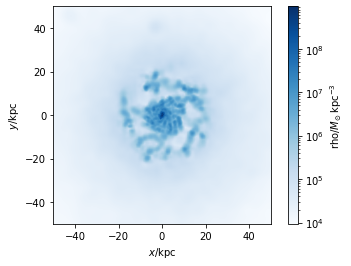

In [25]:
# Turns all values into physical units e.g. kpc, Msol...

s.physical_units()

# Plot the gas of halo 1 with a width of 100 kpc in the x and y. Set the density color to blue.
pynbody.plot.image(h1.g, width=100, cmap='Blues')

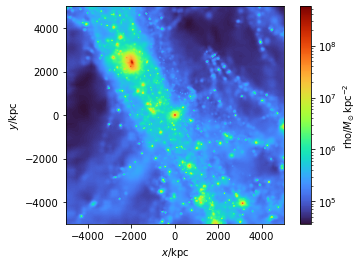

In [29]:
# plot the dark matter of the simulation snapshot within 10 MPC in both x and y. The surface density is mapped in greys 
# I have to say the turbo and turbo_r color scheme is really cool.
pynbody.plot.image(s.d[pynbody.filt.Sphere('10 Mpc')], width='10 Mpc', units = 'Msol kpc^-2', cmap='turbo');

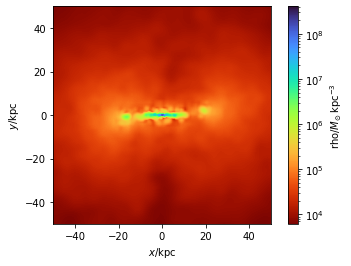

In [31]:
# analyze the angular momementum of halo 1 centered at 0,0,0. 
pynbody.analysis.angmom.sideon(h1, cen=(0,0,0))

# plot the gas of halo one with a width of 100 kpc in both x and y. With turbo_r color scheme
# for the gas density
pynbody.plot.image(h1.g, width=100, cmap='turbo_r');


In [32]:
# Rotate the snapshot by 90 degrees
s.rotate_x(90)

/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


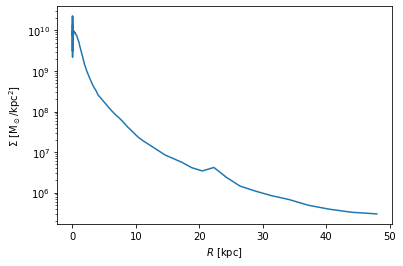

In [33]:
# Analyze the stars of halo one with an x range of 0.01 to 50kpc and set the y axis values to log
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 50, type = 'log')

# clear figure... I think
pylab.clf()

# plot the radius vs density of stars of halo one
pylab.plot(ps['rbins'], ps['density']);

# set the y-axis to semi log
pylab.semilogy();

pylab.xlabel('$R$ [kpc]');

pylab.ylabel('$\Sigma$ [M$_\odot$/kpc$^2$]');

/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


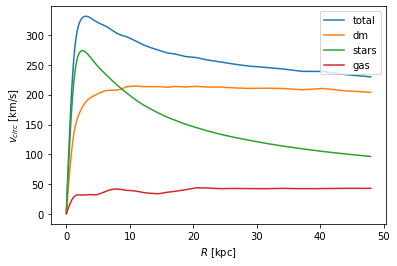

In [34]:
# Create a figure
pylab.figure()

# Do analysis of the dark matter profile of halo one in the radius range of 0.01 to 50kpc
pd = pynbody.analysis.profile.Profile(h1.d,min=.01,max=50, type = 'log')

# Do analysis of the gas profile of halo one in the radius range of 0.01 to 50kpc
pg = pynbody.analysis.profile.Profile(h1.g,min=.01,max=50, type = 'log')

# Do analysis of the total profile of halo one in the radius range of 0.01 to 50kpc
p = pynbody.analysis.profile.Profile(h1,min=.01,max=50, type = 'log')

# A for loop created to plot the total, dark matter, stars, and gas velocity profile vs radius 
# all one graph. I'm guessing you can do subplots as well. 
for prof, name in zip([p,pd,ps,pg],['total','dm','stars','gas']) : pylab.plot(prof['rbins'],prof['v_circ'],label=name)

pylab.xlabel('$R$ [kpc]');

pylab.ylabel('$v_{circ}$ [km/s]');

pylab.legend()